# Importing required libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Creating and connecting the Database

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Creating Sales Table

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT
)
""")

# Inserting sample data into the table

In [4]:
# Sample: (product name, quantity sold, price per unit, sale date)
sample_data = [
    ("Apple", 10, 15, "2024-01-10"),
    ("Banana", 20, 5, "2024-01-11"),
    ("Orange", 15, 8, "2024-01-11"),
    ("Apple", 5, 15, "2024-01-12"),
    ("Banana", 10, 5, "2024-01-12"),
    ("Orange", 10, 8, "2024-01-12"),
    ("Mango", 8, 2, "2024-01-13"),
    ("Mango", 5, 2, "2024-01-13")
]

cursor.executemany("INSERT INTO sales (product, quantity, price, date) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

# Queries

## Query 1

In [5]:
# Query 1 - Basic summary (total quantity and revenue by product)
query1 = """
SELECT product, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS total_revenue 
FROM sales 
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print("Total Quantity and Revenue by Product:\n")
print(df1)

Total Quantity and Revenue by Product:

  product  total_quantity  total_revenue
0   Apple              75         1125.0
1  Banana             150          750.0
2   Mango              65          130.0
3  Orange             125         1000.0


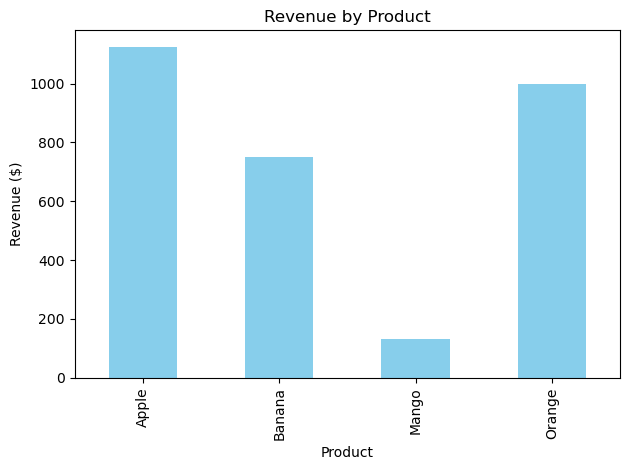

In [6]:
# Plot revenue bar chart
df1.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

## Query 2

In [7]:
# Show total sales (revenue) per day
query2 = """
SELECT date, 
       SUM(quantity * price) AS daily_revenue 
FROM sales 
GROUP BY date
"""
df2 = pd.read_sql_query(query2, conn)
print("\nTotal Revenue by Date:\n")
print(df2)


Total Revenue by Date:

         date  daily_revenue
0  2024-01-10          750.0
1  2024-01-11         1100.0
2  2024-01-12         1025.0
3  2024-01-13          130.0


## Query 3

In [8]:
# List all sales of Mango
query3 = "SELECT * FROM sales WHERE product = 'Mango'"
df3 = pd.read_sql_query(query3, conn)
print("\nAll Mango Sales Records:\n")
print(df3)


All Mango Sales Records:

  product  quantity  price        date
0   Mango         8    2.0  2024-01-13
1   Mango         5    2.0  2024-01-13
2   Mango         8    2.0  2024-01-13
3   Mango         5    2.0  2024-01-13
4   Mango         8    2.0  2024-01-13
5   Mango         5    2.0  2024-01-13
6   Mango         8    2.0  2024-01-13
7   Mango         5    2.0  2024-01-13
8   Mango         8    2.0  2024-01-13
9   Mango         5    2.0  2024-01-13


## Query 4

In [9]:
# Total number of sales records
query4 = "SELECT COUNT(*) as total_sales FROM sales"
df4 = pd.read_sql_query(query4, conn)
print("\nTotal Number of Sales Records:\n")
print(df4)


Total Number of Sales Records:

   total_sales
0           40


## Query 5

In [10]:
# Average price of each product
query5 = """
SELECT product, 
       ROUND(AVG(price), 2) AS average_price 
FROM sales 
GROUP BY product
"""
df5 = pd.read_sql_query(query5, conn)
print("\nAverage Price per Product:\n")
print(df5)


Average Price per Product:

  product  average_price
0   Apple           15.0
1  Banana            5.0
2   Mango            2.0
3  Orange            8.0


# Closing the connection

In [11]:
conn.close()